# Losango

## Autor

[Henrique  Bastos](https://henriquebastos.net)



Se conecte comigo nas redes:
[YouTube](https://hbn.link/youtube_HB), [Facebook](https://hbn.link/fanpage_HB), [Twitter](https://hbn.link/twitter_HB), [Instagram](https://hbn.link/instagram_HB), [Whatsapp](https://hbn.link/hb-ajudae), [Telegram](https://t.me/henriquebastos), [Email](mailto:henrique@bastos.net)

## Licença

<img alt="Licença Creative Commons" style="border-width:0; margin-left:0;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" />

Este trabalho está licenciado com uma Licença [Creative Commons - Atribuição-CompartilhaIgual 4.0 Internacional](http://creativecommons.org/licenses/by-sa/4.0/).

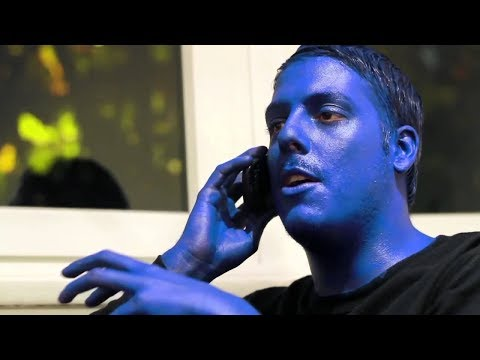

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('eP1RCj8_ChE', 560, 315)

In [2]:
# setup
from ipywidgets import interact

# Introdução

O André Bandeli postou uma dúvida no Facebook sobre [como construir um losango em texto](https://www.facebook.com/groups/python.brasil/permalink/1859488167489378/).

Exemplo:

```
    0    
   010   
  01210  
 0123210 
012343210
 0123210 
  01210  
   010   
    0    
```

A dúvida dele era sobre como centralizar o `range` do Python para calcular cada linha.

# O Problema

Esse desafio é o caso clássico onde ir direto no alvo é mais difícil do que comer pelas beiradas.

```
  0  
 010 
01210
 010 
  0   
```

1. Ir direto vai fazer focar no output se perdendo em loops e manipulações de strings.
2. Comer pelas beiradas implica em decompor o problema em problemas menores.

# Qual a estratégia?

```
..0..
.010.
01210
.010.
..0..
```

1. Como centraliza os números na linha?
2. Como cria o intervalo de 0...N...0?
3. Como transforma o intervalo em texto?
4. Como gera a linha a partir do intervalo?
5. Como gera o losango com uma pilha de linhas?

# Como centraliza os números?

```
..0..
.010.
01210
.010.
..0..
```

In [3]:
def centraliza(texto, largura):
    '''Versão 1'''
    margem = (largura - len(texto)) // 2
    return ' ' * margem + texto + ' ' * margem


def centraliza(texto, largura):
    '''Versão 2'''
    return texto.center(largura)


def centraliza(texto, largura, separador=' '):
    '''Versão 3'''
    return f'{texto:{separador}^{largura}}'


n = 2
largura = n * 2 + 1
assert centraliza('0', largura) == '  0  '
assert centraliza('010', largura) == ' 010 '
assert centraliza('01210', largura) == '01210'

# Como cria o intervalo de 0...N...0?

```
..0..
.010.
01210
.010.
..0..
```

In [4]:
def intervalo(n):
    '''Versão 1'''
    return list(range(n)) + list(range(n, -1, -1))


def intervalo(n):
    '''Versão 2'''
    return [*range(n), *range(n, -1, -1)]

assert intervalo(0) == [0]
assert intervalo(1) == [0, 1, 0]
assert intervalo(2) == [0, 1, 2, 1, 0]
assert intervalo(9) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


list(range(0)) == []
list(range(1)) == [0]
list(range(2)) == [0, 1]

True

# Como transforma o intervalo em texto?

```
..0..
.010.
01210
.010.
..0..
```

In [5]:
def texto(numeros):
    '''Versão 1'''
    l = []
    for n in numeros:
        l.append(str(n))
    return ''.join(l)


def texto(numeros):
    '''Versão 2'''
    return ''.join(str(n) for n in numeros)


assert texto(intervalo(2)) == '01210'


# Como gera a linha em texto a partir do intervalo?

```
..0..
.010.
01210
.010.
..0..
```

In [7]:
def linha(n, largura, separador=' '):
    return centraliza(texto(intervalo(n)), largura, separador)

assert linha(0, 5) == '  0  '
assert linha(3, 7) == '0123210'

In [8]:
interact(linha, n=(0, 9, 1), largura=(0, 9*2+1, 1))

interactive(children=(IntSlider(value=4, description='n', max=9), IntSlider(value=9, description='largura', ma…

<function __main__.linha(n, largura, separador=' ')>

# Como cria a pilha de linhas?

```
..0..
.010.
01210
.010.
..0..
```

In [9]:
def losango(n):
    '''Versão 1'''
    largura = n * 2 + 1

    numeros = intervalo(n)
    linhas = []
    
    for n in numeros:
        linhas.append(linha(n, largura))

    print('\n'.join(linhas))


def losango(n):
    '''Versão 2'''
    largura = n * 2 + 1
    return '\n'.join([linha(n, largura) for n in intervalo(n)])

def losango(tamanho):
    '''Versão 3'''
    largura = tamanho * 2 + 1
    return '\n'.join(linha(n, largura) for n in intervalo(tamanho))


assert losango(2) == (
    '  0  \n'
    ' 010 \n'
    '01210\n'
    ' 010 \n'
    '  0  '
)

interact(lambda n: print(losango(n)), n=(0, 9, 1))

interactive(children=(IntSlider(value=4, description='n', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.<lambda>(n)>

# Como fica tudo junto?

In [10]:
def intervalo(n):
    return (*range(n), *range(n, -1, -1))


def centraliza(texto, largura, separador=' '):
    return f'{texto:{separador}^{largura}}'


def texto(numeros):
    return ''.join(str(n) for n in numeros)


def linha(n, largura, sep=' '):
    return centraliza(texto(intervalo(n)), largura, sep)


def losango(n, separador=' '):
    largura = n * 2 + 1

    return '\n'.join(linha(n, largura, separador) for n in intervalo(n))


assert centraliza('0', largura=5) == '  0  '
assert centraliza('010', largura=5) == ' 010 '
assert centraliza('01210', largura=5) == '01210'

assert intervalo(0) == (0,)
assert intervalo(1) == (0, 1, 0)
assert intervalo(2) == (0, 1, 2, 1, 0)
assert intervalo(9) == (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0)

assert texto(intervalo(2)) == '01210'

assert linha(3, largura=7) == '0123210'
assert linha(0, largura=7) == '   0   '

assert losango(2) == (
    '  0  \n'
    ' 010 \n'
    '01210\n'
    ' 010 \n'
    '  0  '
)


In [11]:
interact(lambda n, sep: print(losango(n, sep)), n=(0, 9, 1), sep=' ')

interactive(children=(IntSlider(value=4, description='n', max=9), Text(value=' ', description='sep'), Output()…

<function __main__.<lambda>(n, sep)>